In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import matplotlib.font_manager as fm
import numpy as np

In [10]:
# 字型設定
sns.set(font=['sans-serif'])
sns.set_style("whitegrid",{"font.sans-serif":['Microsoft JhengHei']})

In [11]:
data = pd.read_csv('dataset/All_Data_NutritionFacts.csv', index_col=False)

# 把分享盒分開
sharing_box = data[data["Name"].str.contains('sharing-box')]
data = data[~data["Name"].str.contains('sharing-box')]

data.head()

,Category,Name,Calories (Kcal),Protein (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carbohydrate (g),Total Sugars (g),Sodium (mg)
0,breakfast,egg-mcmuffin,290.0,19.0,11.0,5.3,0.2,28.0,1.9,696.4
1,breakfast,sausage-mcmuffin,316.0,16.0,16.0,7.2,0.2,27.0,1.6,710.0
2,breakfast,sausage-mcmuffin-with-egg,389.0,24.0,20.0,8.8,0.2,28.0,1.6,781.3
3,breakfast,mega-mcmuffin,509.0,32.0,30.0,13.0,0.2,28.0,1.6,1002.8
4,breakfast,chicken-muffin-with-egg,419.0,21.0,20.0,5.3,0.0,39.0,2.1,821.1


## 資料檢查

In [12]:
# 檢查資料類型
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 156 entries, 0 to 161
Data columns (total 10 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Category                156 non-null    object 
 1   Name                    156 non-null    object 
 2   Calories (Kcal)         156 non-null    float64
 3   Protein (g)             156 non-null    float64
 4   Total Fat (g)           156 non-null    float64
 5   Saturated Fat (g)       156 non-null    float64
 6   Trans Fat (g)           156 non-null    float64
 7   Total Carbohydrate (g)  156 non-null    float64
 8   Total Sugars (g)        156 non-null    float64
 9   Sodium (mg)             156 non-null    float64
dtypes: float64(8), object(2)
memory usage: 13.4+ KB


In [13]:
# 檢查是否有缺失值
data.isna().sum()

Category                  0
Name                      0
Calories (Kcal)           0
Protein (g)               0
Total Fat (g)             0
Saturated Fat (g)         0
Trans Fat (g)             0
Total Carbohydrate (g)    0
Total Sugars (g)          0
Sodium (mg)               0
dtype: int64

In [14]:
# 每樣麥當勞食物的描述性統計
data.describe()

,Calories (Kcal),Protein (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carbohydrate (g),Total Sugars (g),Sodium (mg)
count,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000,156.000000
mean,288.032051,11.280769,12.231410,4.663462,0.092949,33.437821,17.160897,356.931026
std,184.808337,11.022950,11.218106,3.831888,0.145519,24.450826,20.329063,367.605354
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,151.250000,2.325000,4.225000,1.600000,0.000000,14.000000,2.100000,56.200000
50%,270.000000,7.950000,11.000000,4.150000,0.000000,31.000000,8.600000,196.200000
75%,411.750000,17.250000,17.250000,6.700000,0.100000,42.000000,27.250000,666.700000
max,875.000000,54.000000,61.000000,16.000000,0.900000,126.000000,84.000000,1511.700000


Text(0.5, 1.0, '食物類別的數量')

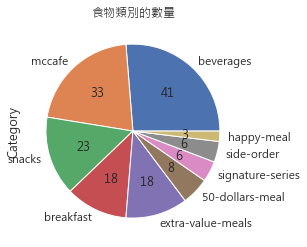

In [15]:
# 食物類別的數量
i = [0]
df = pd.DataFrame(data['Category'].value_counts())
def absolute_value(val):
    a  = df.iloc[i[0]%len(df),i[0]//len(df)]
    i[0] += 1
    return a
fig = plt.figure()
fig.patch.set_facecolor('white')
ax = data['Category'].value_counts().plot(kind='pie', autopct=absolute_value)
ax.set_title('食物類別的數量')

## 不同類別食物的卡路里含量

In [16]:
# 每種分類的平均營養數值
data.groupby('Category').mean()

,Calories (Kcal),Protein (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carbohydrate (g),Total Sugars (g),Sodium (mg)
Category,,,,,,,,
50-dollars-meal,357.625000,10.462500,12.912500,4.037500,0.075000,50.087500,29.562500,444.787500
beverages,128.390244,2.926829,3.107317,1.919512,0.051220,22.124390,20.695122,41.943902
breakfast,383.388889,19.661111,16.705556,5.838889,0.105556,39.000000,4.894444,734.066667
extra-value-meals,486.888889,26.944444,27.166667,8.377778,0.188889,34.277778,4.822222,856.311111
happy-meal,490.666667,13.633333,10.566667,3.000000,0.066667,86.500000,53.300000,488.466667
mccafe,223.000000,6.172727,8.160606,5.312121,0.103030,31.333333,23.709091,113.237576
side-order,520.833333,10.400000,19.200000,5.250000,0.050000,77.116667,43.566667,383.650000
signature-series,458.166667,26.166667,23.666667,8.416667,0.266667,35.500000,8.300000,836.133333
snacks,279.913043,11.008696,14.326087,4.100000,0.043478,26.969565,7.117391,402.413043


<AxesSubplot:title={'center':'不同類別食物的卡路里含量'}, xlabel='Category', ylabel='Calories (Kcal)'>

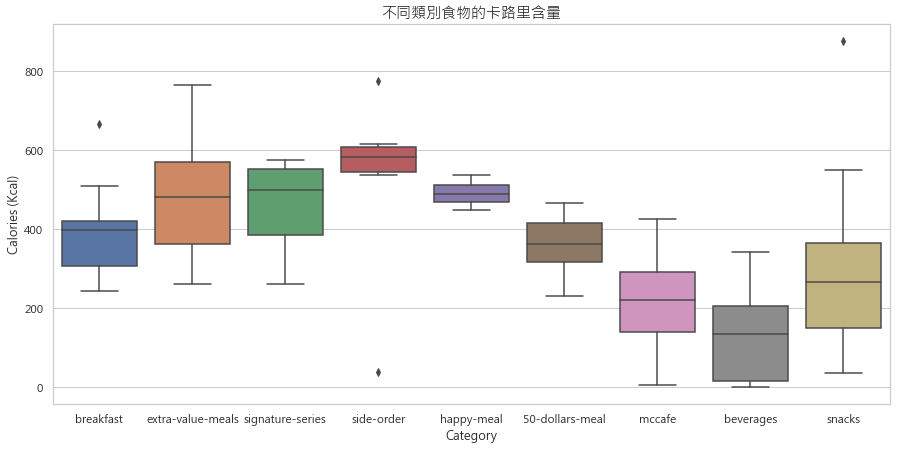

In [17]:
fig = plt.figure(figsize=(15,7))
plt.title('不同類別食物的卡路里含量', fontsize=15)
sns.boxplot(x='Category', y='Calories (Kcal)', data=data)


## 食品營養成分含量最多前10名

In [20]:
def nut_data(nutrition):
    new_data = data[['Category', 'Name', nutrition]]
    return new_data

In [21]:
# 卡路里
nut_data('Calories (Kcal)').sort_values('Calories (Kcal)')[-10:]

,Category,Name,Calories (Kcal)
30,extra-value-meals,mushroom-angus-beef-burger,575.0
44,side-order,chicken-mccrispy-side-order,591.0
25,extra-value-meals,chicken-mccrispy-wing-2-pieces,611.0
26,extra-value-meals,spicy-chicken-mccrispy-wing-2-pieces,612.0
47,side-order,sweet-potato-side-order,614.0
14,breakfast,grand-breakfast,664.0
27,extra-value-meals,chicken-mccrispy-2-pieces,747.0
28,extra-value-meals,spicy-chicken-mccrispy-2-pieces,765.0
45,side-order,mcflurry-fries-side-order,773.0
147,snacks,spicy-chicken-wing-6-pieces,875.0


In [22]:
# 飽和脂肪
nut_data('Saturated Fat (g)').sort_values('Saturated Fat (g)')[-10:]

,Category,Name,Saturated Fat (g)
95,mccafe,cinnamon-swirl,13.0
28,extra-value-meals,spicy-chicken-mccrispy-2-pieces,13.0
3,breakfast,mega-mcmuffin,13.0
147,snacks,spicy-chicken-wing-6-pieces,13.0
19,extra-value-meals,double-cheese-burger,14.0
27,extra-value-meals,chicken-mccrispy-2-pieces,14.0
30,extra-value-meals,mushroom-angus-beef-burger,14.0
39,signature-series,mushroom-angus-beef-burger,14.0
88,mccafe,iced-chocolate,15.0
89,mccafe,iced-chocolate-large,16.0


In [43]:
# 反式脂肪
nut_data('Trans Fat (g)').sort_values('Trans Fat (g)')[-10:]

,Category,Name,Trans Fat (g)
87,mccafe,hot-chocolate-large,0.2
89,mccafe,iced-chocolate-large,0.2
57,50-dollars-meal,cheese-burger-and-coke,0.4
140,snacks,cheese-burger,0.4
31,extra-value-meals,blt-angus-beef-burger,0.5
36,signature-series,blt-angus-beef-burger,0.5
39,signature-series,mushroom-angus-beef-burger,0.7
18,extra-value-meals,big-mac,0.7
30,extra-value-meals,mushroom-angus-beef-burger,0.7
19,extra-value-meals,double-cheese-burger,0.9


In [24]:
# 碳水化合物
nut_data('Total Carbohydrate (g)').sort_values('Total Carbohydrate (g)')[-10:]

,Category,Name,Total Carbohydrate (g)
123,beverages,coke-large,75.0
129,beverages,sprite-large,80.0
90,mccafe,honey-lemon-duet-frappe,83.0
56,happy-meal,mcfish-happy-meal,91.8
91,mccafe,mango-lemon-duet-frappe,92.0
55,happy-meal,burger-happy-meal,96.0
42,side-order,french-fries-side-order,97.0
92,mccafe,berry-lemon-duet-frappe,106.0
47,side-order,sweet-potato-side-order,118.0
45,side-order,mcflurry-fries-side-order,126.0


In [40]:
# 糖
nut_data('Total Sugars (g)').sort_values('Total Sugars (g)')[-16:]

,Category,Name,Total Sugars (g)
122,beverages,coke-medium,50.0
54,happy-meal,chicken-mcnuggets-4-pieces-happy-meal,50.0
42,side-order,french-fries-side-order,51.1
128,beverages,sprite-medium,53.0
44,side-order,chicken-mccrispy-side-order,53.0
56,happy-meal,mcfish-happy-meal,54.3
55,happy-meal,burger-happy-meal,55.6
132,beverages,iced-black-tea-lemon-flavor-large,58.0
62,50-dollars-meal,ice-cream-cone-large-and-sprite,65.0
47,side-order,sweet-potato-side-order,72.0


In [26]:
# 鈉
nut_data('Sodium (mg)').sort_values('Sodium (mg)')[-10:]

,Category,Name,Sodium (mg)
155,snacks,corn-soup-large,956.3
3,breakfast,mega-mcmuffin,1002.8
149,snacks,tender-chicken-wing-6-pieces,1083.1
32,extra-value-meals,blt-spicy-chicken-burger,1111.3
37,signature-series,blt-spicy-chicken-burger,1111.3
27,extra-value-meals,chicken-mccrispy-2-pieces,1157.1
14,breakfast,grand-breakfast,1272.3
147,snacks,spicy-chicken-wing-6-pieces,1382.3
26,extra-value-meals,spicy-chicken-mccrispy-wing-2-pieces,1414.8
28,extra-value-meals,spicy-chicken-mccrispy-2-pieces,1511.7


## 分析每樣麥當勞食品的營養成分佔每日推薦攝取量的百分比

每日推薦攝取量(參考麥當勞官方資料)

In [27]:
def draw_top5(df, column_name, standard_value):
    df = data[['Name', column_name]]
    dv = pd.DataFrame((df[column_name] / standard_value).apply(lambda x: round(x, 3) * 100))
    dv.columns = ['佔每日攝取量 (%)']
    df = pd.concat([df, dv], axis=1)
    c = df.sort_values(column_name)[-5:]
    return sns.scatterplot(data=c, x = column_name, y=c["佔每日攝取量 (%)"], hue=c['Name'], s=150)

<AxesSubplot:xlabel='Calories (Kcal)', ylabel='佔每日攝取量 (%)'>

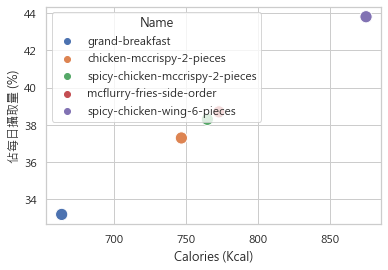

In [28]:
draw_top5(data, 'Calories (Kcal)', 2000)

<AxesSubplot:xlabel='Protein (g)', ylabel='佔每日攝取量 (%)'>

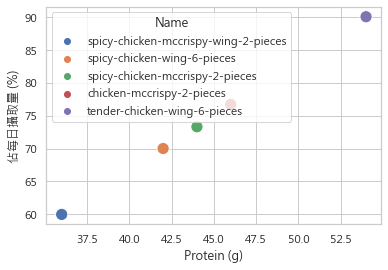

In [29]:
# 蛋白質
draw_top5(data, 'Protein (g)', 60)

<AxesSubplot:xlabel='Total Fat (g)', ylabel='佔每日攝取量 (%)'>

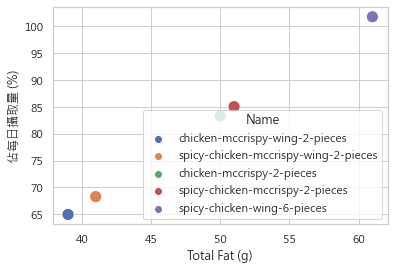

In [30]:
# 總脂肪
draw_top5(data, 'Total Fat (g)', 60)

<AxesSubplot:xlabel='Saturated Fat (g)', ylabel='佔每日攝取量 (%)'>

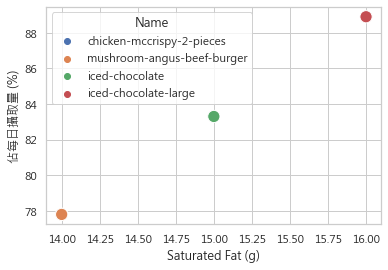

In [31]:
# 飽和脂肪
draw_top5(data, 'Saturated Fat (g)', 18)

<AxesSubplot:xlabel='Trans Fat (g)', ylabel='佔每日攝取量 (%)'>

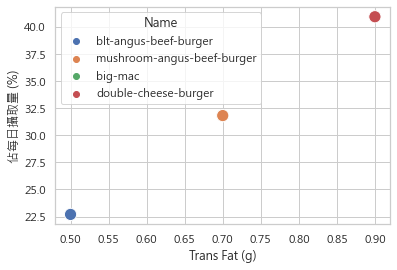

In [32]:
# 反式脂肪
draw_top5(data, 'Trans Fat (g)', 2.2)

<AxesSubplot:xlabel='Total Carbohydrate (g)', ylabel='佔每日攝取量 (%)'>

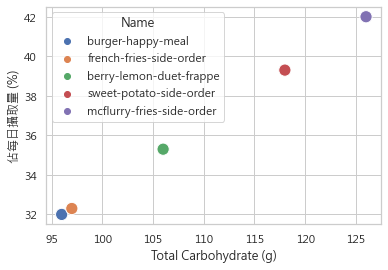

In [33]:
# 碳水化合物
draw_top5(data, 'Total Carbohydrate (g)', 300)

<AxesSubplot:xlabel='Total Sugars (g)', ylabel='佔每日攝取量 (%)'>

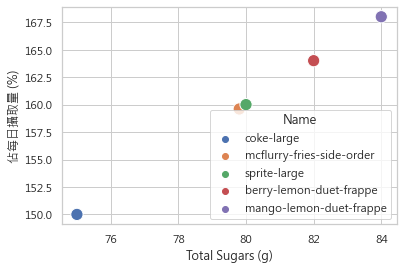

In [34]:
# 總糖
draw_top5(data, 'Total Sugars (g)', 50)

<AxesSubplot:xlabel='Sodium (mg)', ylabel='佔每日攝取量 (%)'>

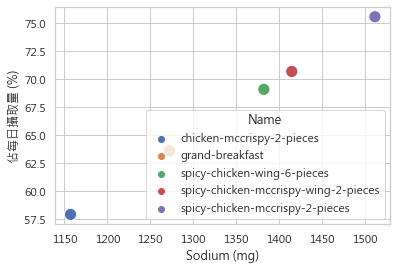

In [35]:
# 鈉 
draw_top5(data, 'Sodium (mg)', 2000)

## 麥當勞營養計算機

In [28]:
# # 菜單
# menu = data[['Category', 'Name']]
# menu2 = pd.DataFrame()
# for i, j in menu.groupby('Category'):
#     tmp = pd.DataFrame(menu.groupby('Category').get_group(i).reset_index()['Name'])
#     tmp.columns = [i]
#     menu2 = pd.concat([menu2, tmp], axis=1)

In [29]:
# 儲存菜單
# menu2.to_csv('dataset/menu.csv', index = False)

In [32]:
# 菜單
menu = pd.read_csv('dataset/menu.csv')
menu.fillna('', inplace = True)
menu

,50-dollars-meal,beverages,breakfast,extra-value-meals,happy-meal,mccafe,side-order,signature-series,snacks
0,51: cheese-burger-and-coke,92: iced-americano,0: egg-mcmuffin,18: big-mac,48: chicken-mcnuggets-4-pieces-happy-meal,59: espresso,42: french-fries-side-order,36: blt-angus-beef-burger,133: hamburger
1,52: mcchicken-and-hot-black-tea,93: americano,1: sausage-mcmuffin,19: double-cheese-burger,49: burger-happy-meal,60: americano,43: salad-side-order,37: blt-spicy-chicken-burger,134: cheese-burger
2,53: chicken-mcnuggets-4-pieces-and-corn-soup,94: latte,2: sausage-mcmuffin-with-egg,20: grilled-bbq-chicken-burger,50: mcfish-happy-meal,61: iced-americano,44: chicken-mccrispy-side-order,38: blt-grilled-chicken-burger,135: sweet-potato
3,54: tender-chicken-wing-and-coke,95: latte-large,3: mega-mcmuffin,21: mcchicken,,62: latte,45: mcflurry-fries-side-order,39: mushroom-angus-beef-burger,136: french-fries-small
4,55: spicy-chicken-wing-and-fuze-tea,96: iced-latte,4: chicken-muffin-with-egg,22: chicken-mcnuggets-6-pieces,,63: latte-large,46: nuggets-fries-side-order,40: caesar-salad-with-spicy-fried-chicken-filet,137: french-fries-medium
5,56: ice-cream-cone-large-and-sprite,97: iced-latte-large,5: chicken-muffin,23: chicken-mcnuggets-10-pieces,,64: iced-latte,47: sweet-potato-side-order,41: italian-salad-with-grilled-chicken-filet,138: french-fries-large
6,57: apple-pie-and-hot-black-tea,98: cappuccino,6: muffin-with-vegetables,24: spicy-chicken-filet-burger,,65: iced-latte-large,,,139: hash-browns
7,58: french-fries-and-sprite,99: cappuccino-large,7: egg-burger-with-chicken,25: chicken-mccrispy-wing-2-pieces,,66: cappuccino,,,140: spicy-chicken-wing-2-pieces
8,,100: iced-cappuccino,8: egg-burger,26: spicy-chicken-mccrispy-wing-2-pieces,,67: cappuccino-large,,,141: spicy-chicken-wing-6-pieces
9,,101: honey-black-tea-iced,9: egg-burger-with-sausage,27: chicken-mccrispy-2-pieces,,68: iced-cappuccino,,,142: tender-chicken-wing-2-pieces


In [83]:
# data.to_csv('dataset\order.csv', index = False)

In [4]:
order = pd.read_csv('dataset\order.csv', index_col=False)
order.head()

,Category,Name,Calories (Kcal),Protein (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carbohydrate (g),Total Sugars (g),Sodium (mg)
0,breakfast,0,290,19.0,11.0,5.3,0.2,28.0,1.9,696.4
1,breakfast,1,316,16.0,16.0,7.2,0.2,27.0,1.6,710.0
2,breakfast,2,389,24.0,20.0,8.8,0.2,28.0,1.6,781.3
3,breakfast,3,509,32.0,30.0,13.0,0.2,28.0,1.6,1002.8
4,breakfast,4,419,21.0,20.0,5.3,0.0,39.0,2.1,821.1


In [5]:
dv = {'Calories (Kcal)':2000, 'Protein (g)':60, 'Total Fat (g)':60,
       'Saturated Fat (g)':18, 'Trans Fat (g)':2.2, 'Total Carbohydrate (g)':300,
       'Total Sugars (g)':50, 'Sodium (mg)':2000}

In [6]:
def calulate_nutrition_facts(what_you_eat):
    df = pd.DataFrame(None, columns=order.columns)
    for food in what_you_eat:
        df = pd.concat([df, (order.loc[order['Name'] == food])])
    df = pd.DataFrame(df.drop(['Name', 'Category'],axis=1).sum()).T

    # dv (%)
    over = df.copy().astype(float)
    for key, value in dv.items():
        over[key] = round(over[key] / dv[key], 3) * 100
    df = pd.concat([df, over])
    df.index = ['總含量', '佔每日推薦攝取量 (%)']

    return df

In [7]:
# 儲存計算結果

choice = list(map(int, input().split()))
calulate_nutrition_facts(choice).to_csv('dataset\calulate_nutrition_facts.csv')

In [8]:
cnf = pd.read_csv('dataset\calulate_nutrition_facts.csv')
cnf

,Unnamed: 0,Calories (Kcal),Protein (g),Total Fat (g),Saturated Fat (g),Trans Fat (g),Total Carbohydrate (g),Total Sugars (g),Sodium (mg)
0,總含量,2161.0,58.3,83.0,28.6,1.0,300.0,139.8,1958.1
1,佔每日推薦攝取量 (%),108.0,97.2,138.3,158.9,45.5,100.0,279.6,97.9
